In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

fpath = "/content/drive/MyDrive/Human_Development_Index_Dataset.csv"
df = pd.read_csv(fpath, encoding='latin1')


In [ ]:
# Remove unnecessary index column if present
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

# Identify unique years
unique_years = df['year'].unique()
print("Unique years in dataset:")
print(unique_years)

Unique years in dataset:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [ ]:
# Filter dataset for year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

# Save filtered dataframe for Problem 1A
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)

hdi_2022_df.head(10)

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [ ]:
# Check missing values in each column
print("Missing values per column:")
print(hdi_2022_df.isnull().sum())


Missing values per column:
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


In [ ]:
# List of numeric columns that may be stored as text
numeric_cols = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

# Convert to numeric (handle special characters like "–")
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')


In [ ]:
# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)


In [ ]:
# Drop rows with missing HDI (core indicator)
hdi_2022_df.dropna(subset=['hdi'], inplace=True)

# Re-check missing values
print("Missing values after cleaning:")
print(hdi_2022_df.isnull().sum())


Missing values after cleaning:
iso3                          0
country                       0
year                          0
hdi                           0
life_expectancy               0
pop_millions                  0
hdi_f                        11
hdi_m                        11
life_expec_f                  0
life_expec_m                  0
expec_yr_school               0
expec_yr_school_f             0
expec_yr_school_m             0
mean_yr_school                0
mean_yr_school_f              0
mean_yr_school_m              0
gross_inc_percap              0
gross_inc_percap_f           11
gross_inc_percap_m           11
gender_development           11
gender_inequality            27
secondary_education_f_%      15
secondary_education_m_%      15
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     11
labour_participation_m_%     11
co2_emission_tons             1
mat_footprint_percap_tons    39
dtype: int64


In [ ]:
# Compute basic statistics
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print("Mean HDI:", mean_hdi)
print("Median HDI:", median_hdi)
print("Standard Deviation of HDI:", std_hdi)


Mean HDI: 0.7228872549019609
Median HDI: 0.7395
Standard Deviation of HDI: 0.15302880386427825


In [ ]:
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

print("Country with Highest HDI (2022):")
print(highest_hdi_country[['country','hdi']])

print("\nCountry with Lowest HDI (2022):")
print(lowest_hdi_country[['country','hdi']])


Country with Highest HDI (2022):
country    Switzerland
hdi              0.967
Name: 5609, dtype: object

Country with Lowest HDI (2022):
country    Somalia
hdi           0.38
Name: 5345, dtype: object


In [ ]:
# Filter countries with HDI greater than 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by GNI per capita (descending)
high_hdi_sorted_df = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

# Display top 10 countries
high_hdi_sorted_df[['country','hdi','gross_inc_percap']].head(10)


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


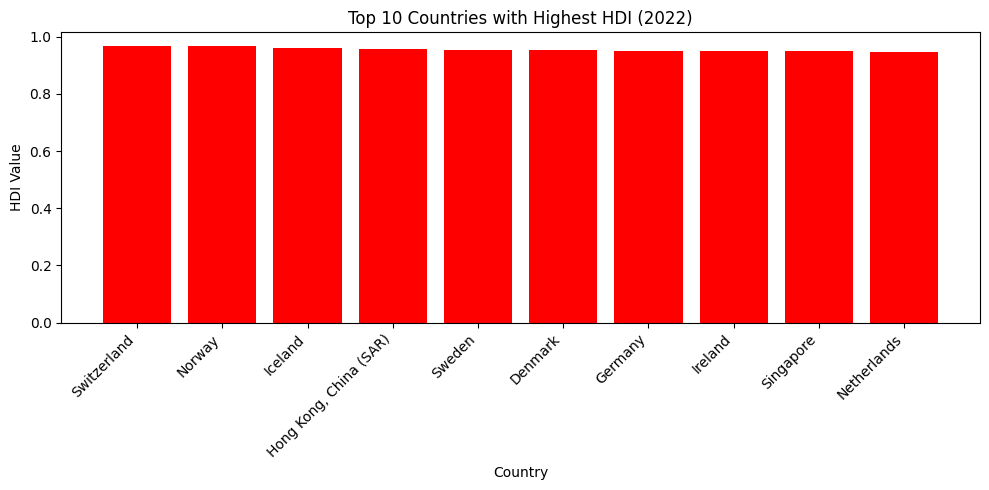

In [ ]:
# Select top 10 countries with highest HDI
top10_hdi = hdi_2022_df.sort_values(
    by='hdi',
    ascending=False
).head(10)

plt.figure(figsize=(10, 5))
plt.bar(
    top10_hdi['country'],
    top10_hdi['hdi'],
    color='red'
)

plt.xlabel("Country")
plt.ylabel("HDI Value")
plt.title("Top 10 Countries with Highest HDI (2022)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


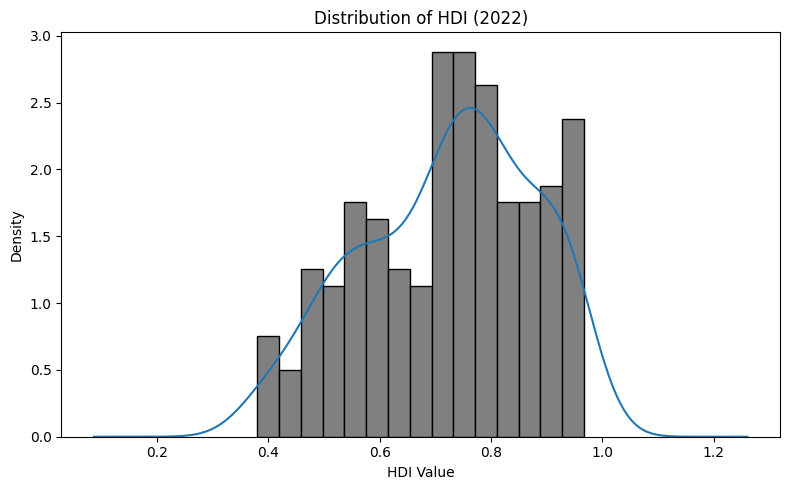

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(hdi_2022_df['hdi'], bins=15, density=True,
         color='grey', edgecolor='black')

hdi_2022_df['hdi'].plot(kind='kde')
SS
plt.xlabel("HDI Value")
plt.ylabel("Density")
plt.title("Distribution of HDI (2022)")
plt.tight_layout()
plt.show()


In [ ]:
# Function to classify HDI
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

# Create HDI Category column
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(hdi_category)

# Verify classification
hdi_2022_df['HDI_Category'].value_counts()


,count
HDI_Category,
Very High,71
High,54
Medium,44
Low,35


In [ ]:
# Save final dataframe with HDI Category
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


problem1b

In [ ]:
# Remove unnecessary index column if present
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

# Filter dataset for years 2020–2022
hdi_1b = df[df['year'].isin([2020, 2021, 2022])].copy()

# Save filtered dataset (MANDATORY)
hdi_1b.to_csv("HDI_problem1B.csv", index=False)

hdi_1b.head()

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


In [ ]:
# Check missing values
print("Missing values in essential columns:")
print(hdi_1b[['hdi','country','year']].isnull().sum())


Missing values in essential columns:
hdi        8
country    0
year       0
dtype: int64


In [ ]:
# Convert numeric columns to numeric type
numeric_cols = ['hdi','life_expectancy','gross_inc_percap','gender_development']

for col in numeric_cols:
    hdi_1b[col] = pd.to_numeric(hdi_1b[col], errors='coerce')


In [ ]:
# Remove duplicate rows
hdi_1b.drop_duplicates(inplace=True)


In [ ]:
# Drop rows with missing essential values
hdi_1b.dropna(subset=['hdi','country','year'], inplace=True)

# Recheck missing values
print("Missing values after cleaning:")
print(hdi_1b[['hdi','country','year']].isnull().sum())


Missing values after cleaning:
hdi        0
country    0
year       0
dtype: int64


In [ ]:
# Standardize country names
hdi_1b['country'] = hdi_1b['country'].str.strip()


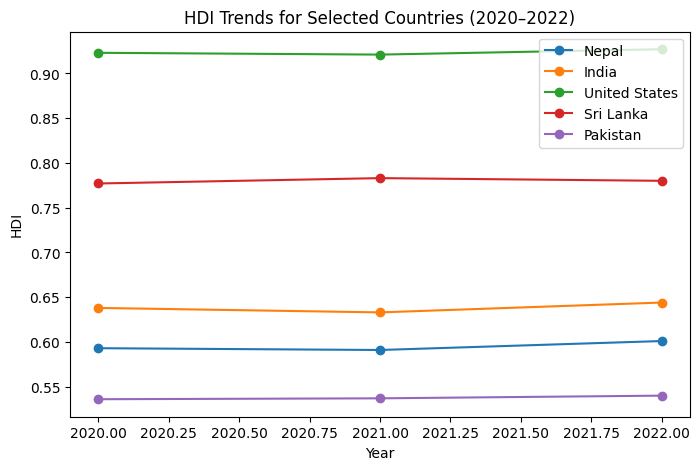

In [ ]:
# Select five countries
countries = ['Nepal','India','United States','Sri Lanka','Pakistan']

plt.figure(figsize=(8,5))
for c in countries:
    data = hdi_1b[hdi_1b['country'] == c]
    plt.plot(data['year'], data['hdi'], marker='o', label=c)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend()
plt.show()


In [ ]:
region_map = {
    "Afghanistan":"South Asia","Bangladesh":"South Asia","Bhutan":"South Asia",
    "India":"South Asia","Maldives":"South Asia","Nepal":"South Asia",
    "Pakistan":"South Asia","Sri Lanka":"South Asia",

    "Bahrain":"Middle East","Iran":"Middle East","Iraq":"Middle East",
    "Israel":"Middle East","Jordan":"Middle East","Kuwait":"Middle East",
    "Lebanon":"Middle East","Oman":"Middle East","Palestine":"Middle East",
    "Qatar":"Middle East","Saudi Arabia":"Middle East","Syria":"Middle East",
    "United Arab Emirates":"Middle East","Yemen":"Middle East"
}

hdi_1b['region'] = hdi_1b['country'].map(region_map)
hdi_1b['region'] = hdi_1b['region'].fillna("Other")


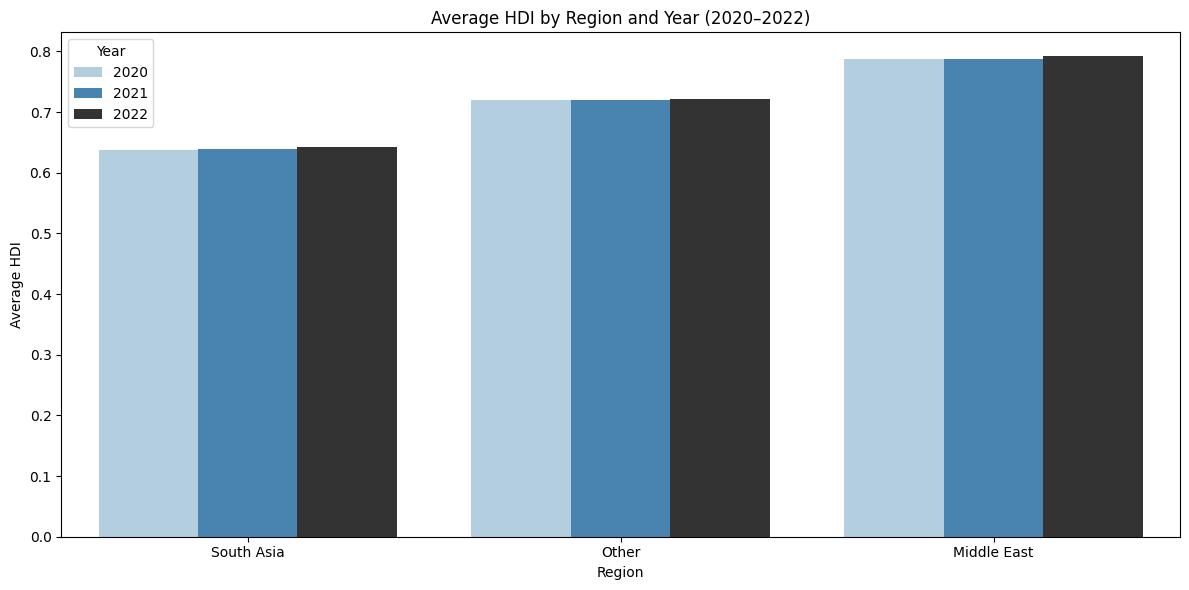

In [ ]:
# Option 2: If you specifically want to show by year (hue)
plt.figure(figsize=(12,6))

sns.barplot(
    data=hdi_1b,
    x='region',
    y='hdi',
    hue='year',                      # this will show separate bars for each year
    palette='Blues_d',
    errorbar=None
)

plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region and Year (2020–2022)")
plt.legend(title='Year')
plt.tight_layout()
plt.show()

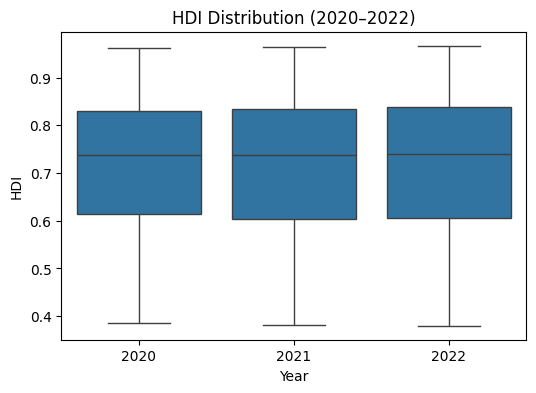

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=hdi_1b, x='year', y='hdi')
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution (2020–2022)")
plt.show()


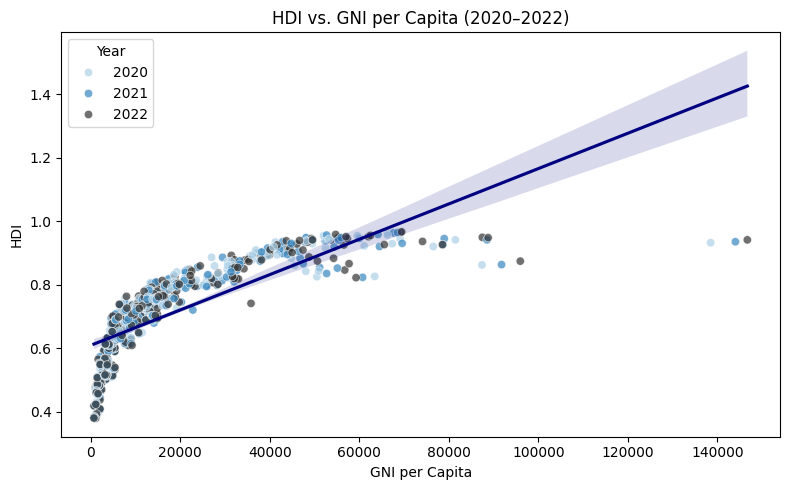

In [ ]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=hdi_1b,
    x='gross_inc_percap',
    y='hdi',
    hue='year',
    palette='Blues_d',
    alpha=0.7
)

sns.regplot(
    data=hdi_1b,
    x='gross_inc_percap',
    y='hdi',
    scatter=False,
    color='navy'
)

plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('HDI vs. GNI per Capita (2020–2022)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [ ]:
# Ensure year is numeric
hdi_1b['year'] = pd.to_numeric(hdi_1b['year'], errors='coerce')


In [ ]:
hdi_change = hdi_1b.pivot_table(
    index='country',
    columns='year',
    values='hdi',
    aggfunc='mean'
)


In [ ]:
hdi_change.columns = hdi_change.columns.astype(int)


In [ ]:
# Identify first and last available years
first_year = hdi_change.columns.min()
last_year = hdi_change.columns.max()

# Create change column
hdi_change['HDI_Change'] = hdi_change[last_year] - hdi_change[first_year]


In [ ]:
hdi_change.sort_values('HDI_Change', ascending=False).head()


year,2020,2021,2022,HDI_Change
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024


In [ ]:
hdi_change[hdi_change['HDI_Change'] < 0]


year,2020,2021,2022,HDI_Change
country,,,,
Afghanistan,0.488,0.473,0.462,-0.026
Angola,0.594,0.590,0.591,-0.003
Australia,0.948,0.949,0.946,-0.002
Belize,0.705,0.698,0.700,-0.005
Brunei Darussalam,0.827,0.824,0.823,-0.004
Bulgaria,0.802,0.796,0.799,-0.003
Burkina Faso,0.446,0.445,0.438,-0.008
Central African Republic,0.389,0.387,0.387,-0.002
Chad,0.396,0.393,0.394,-0.002


In [ ]:
# List of South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter only South Asian countries
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

# Basic cleaning (make sure columns are numeric)
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_cols:
    if col in south_asia_df.columns:
        south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')

# Save the file (very important!)
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

print("South Asia subset created and saved as: HDI_SouthAsia.csv")
print("Number of rows:", len(south_asia_df))
print("Unique countries:", sorted(south_asia_df['country'].unique()))

South Asia subset created and saved as: HDI_SouthAsia.csv
Number of rows: 264
Unique countries: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']


HDI vs Composite Score Ranking Comparison:
             HDI_Rank  Composite_Rank  Avg_HDI  Avg_Composite
country                                                      
Afghanistan         8               8    0.401            555
Bangladesh          5               6    0.531           1043
Bhutan              3               3    0.635           1878
India               4               5    0.541           1151
Maldives            2               1    0.682           4154
Nepal               6               7    0.504            779
Pakistan            7               4    0.473           1184
Sri Lanka           1               2    0.716           2503


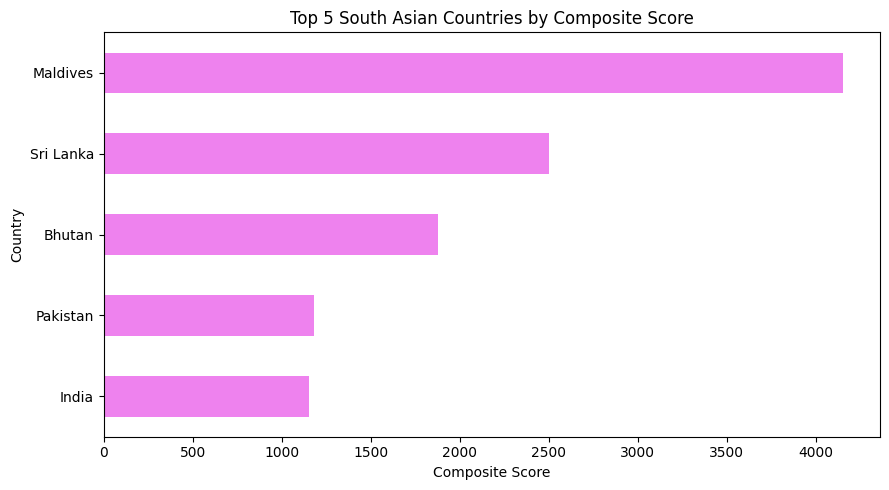

In [ ]:
# 2.2 Composite Development Score

# Create Composite Score (using raw values - common practical approach)
south_asia_df['Composite_Score'] = (
    0.30 * south_asia_df['life_expectancy'].fillna(0) +
    0.30 * south_asia_df['gross_inc_percap'].fillna(0)
)

# Average score per country (most meaningful comparison)
composite_rank = south_asia_df.groupby('country')['Composite_Score'].mean().sort_values(ascending=False)

# Average HDI per country for comparison
hdi_rank = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

# Comparison table
comparison = pd.DataFrame({
    'HDI_Rank': hdi_rank.rank(ascending=False).astype(int),
    'Composite_Rank': composite_rank.rank(ascending=False).astype(int),
    'Avg_HDI': hdi_rank.round(3),
    'Avg_Composite': composite_rank.round(0).astype(int)
})

print("HDI vs Composite Score Ranking Comparison:")
print(comparison)

# Plot top 5 by Composite Score
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
composite_rank.head(5).sort_values().plot(kind='barh', color='violet')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

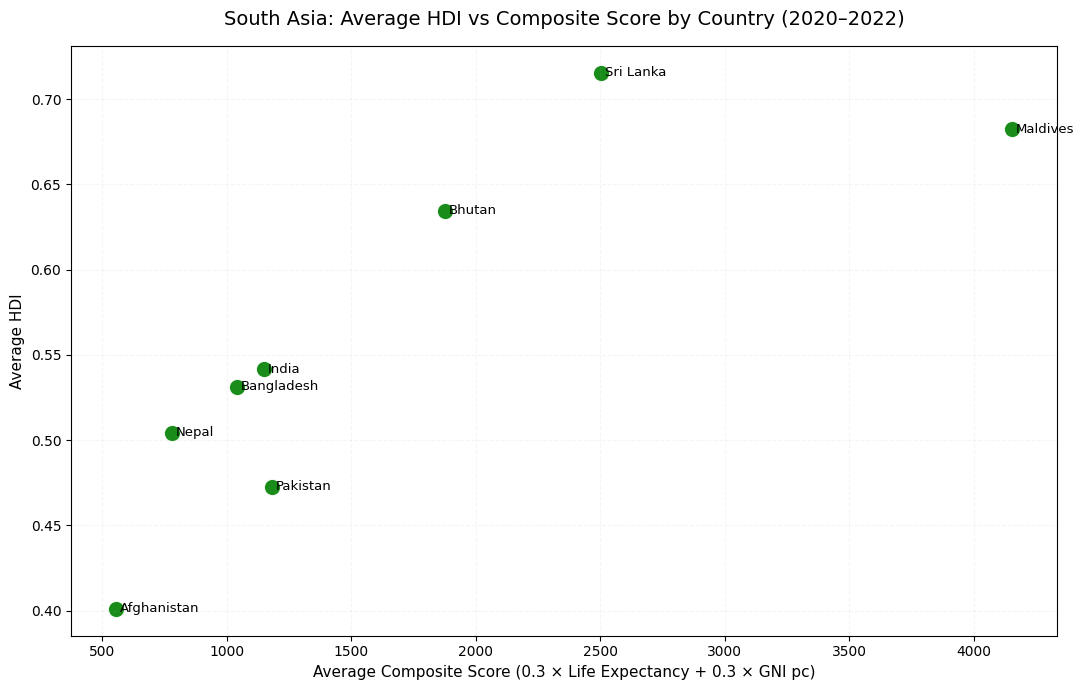

In [ ]:
# === Scatter Plot: Average HDI vs Average Composite Score (South Asia) ===

# Ensure required columns exist
if 'Composite_Score' not in south_asia_df.columns:
    south_asia_df['Composite_Score'] = (
        0.30 * south_asia_df['life_expectancy'].fillna(south_asia_df['life_expectancy'].mean()) +
        0.30 * south_asia_df['gross_inc_percap'].fillna(south_asia_df['gross_inc_percap'].mean())
    )

# Calculate country-level averages
country_avg = south_asia_df.groupby('country').agg({
    'hdi': 'mean',
    'Composite_Score': 'mean'
}).rename(columns={'hdi': 'Avg_HDI', 'Composite_Score': 'Avg_Composite'})

# Create the plot
plt.figure(figsize=(11, 7))
sns.scatterplot(
    data=country_avg,
    x='Avg_Composite',
    y='Avg_HDI',
    s=140,
    color='green',
    alpha=0.9,
    edgecolor='white'
)

# Add country labels with small offset to avoid overlap
for country, row in country_avg.iterrows():
    plt.text(
        row['Avg_Composite'] + 15,          # adjust offset if labels overlap
        row['Avg_HDI'],
        country,
        fontsize=9.5,
        fontweight='medium',
        va='center'
    )

plt.title("South Asia: Average HDI vs Composite Score by Country (2020–2022)", fontsize=14, pad=15)
plt.xlabel("Average Composite Score (0.3 × Life Expectancy + 0.3 × GNI pc)", fontsize=11)
plt.ylabel("Average HDI", fontsize=11)
plt.grid(True, alpha=0.12, linestyle='--')
plt.tight_layout()
plt.show()

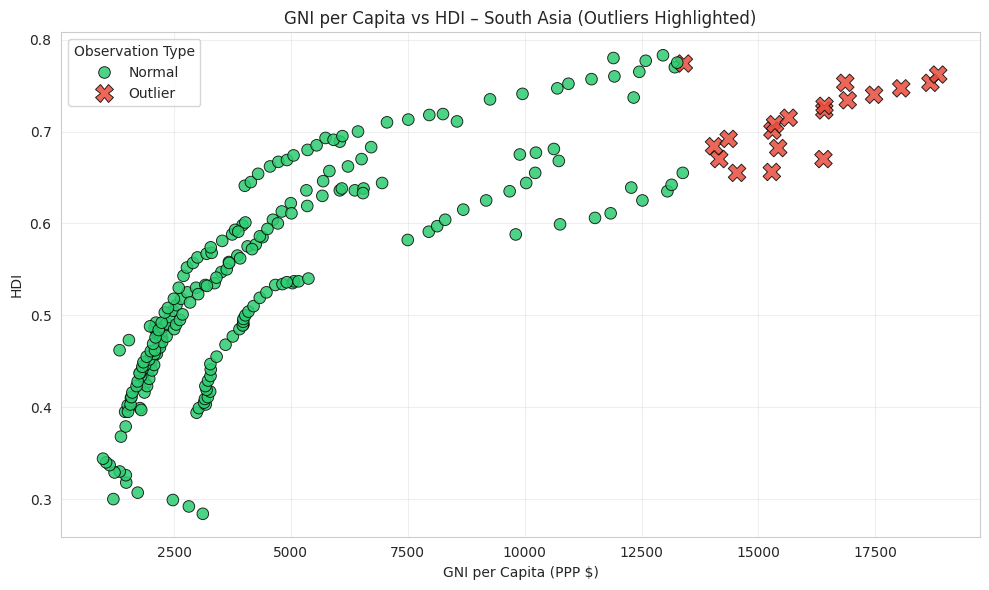

Countries with outliers (HDI or GNI):
['Maldives', 'Sri Lanka']


In [ ]:
# 2.3 Outlier Detection – South Asia

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Flag outliers
south_asia_df['HDI_Outlier'] = detect_outliers(south_asia_df['hdi'])
south_asia_df['GNI_Outlier'] = detect_outliers(south_asia_df['gross_inc_percap'])
south_asia_df['Any_Outlier'] = (
    south_asia_df['HDI_Outlier'] | south_asia_df['GNI_Outlier']
)

# Convert boolean to categorical labels (CRITICAL FIX)
south_asia_df['Outlier_Status'] = south_asia_df['Any_Outlier'].map(
    {True: 'Outlier', False: 'Normal'}
)

# Scatter plot with clear distinction
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi',
    hue='Outlier_Status',
    style='Outlier_Status',
    size='Outlier_Status',
    palette={'Normal': '#2ecc71', 'Outlier': '#e74c3c'},  # Green & Red
    sizes={'Normal': 70, 'Outlier': 160},
    alpha=0.85,
    edgecolor='black'
)

plt.title("GNI per Capita vs HDI – South Asia (Outliers Highlighted)")
plt.xlabel("GNI per Capita (PPP $)")
plt.ylabel("HDI")
plt.legend(title="Observation Type")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display countries with outliers
outliers = south_asia_df.loc[
    south_asia_df['Any_Outlier'], 'country'
].unique()

print("Countries with outliers (HDI or GNI):")
print(list(outliers))


In [ ]:
hdi_rank = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

comparison_df = pd.DataFrame({
    'HDI_Rank': hdi_rank.rank(ascending=False),
    'Composite_Rank': composite_rank.rank(ascending=False)
})

comparison_df


,HDI_Rank,Composite_Rank
country,,
Afghanistan,8.0,8.0
Bangladesh,5.0,6.0
Bhutan,3.0,3.0
India,4.0,5.0
Maldives,2.0,1.0
Nepal,6.0,7.0
Pakistan,7.0,4.0
Sri Lanka,1.0,2.0


In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Detect outliers
south_asia_df['HDI_Outlier'] = detect_outliers(south_asia_df['hdi'])
south_asia_df['GNI_Outlier'] = detect_outliers(south_asia_df['gross_inc_percap'])


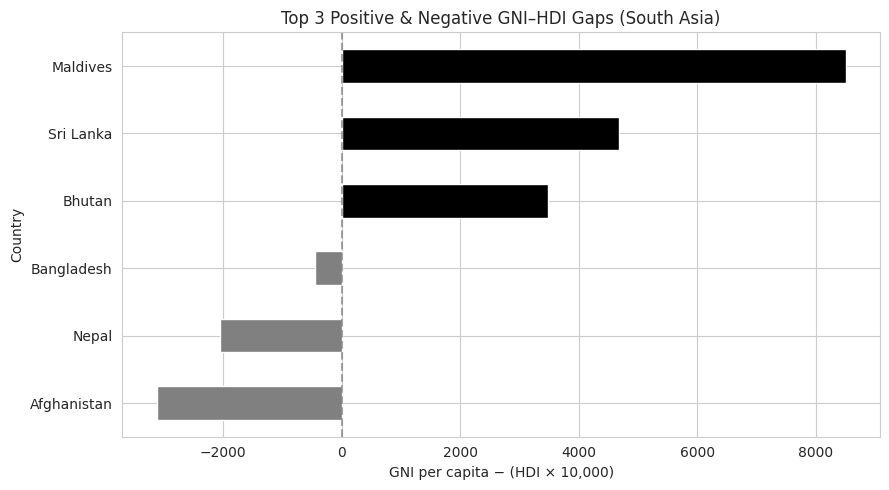

Top positive and negative GNI-HDI gaps:
country
Afghanistan   -3125.0
Nepal         -2048.0
Bangladesh     -445.0
Bhutan         3477.0
Sri Lanka      4683.0
Maldives       8505.0
Name: GNI_HDI_Gap, dtype: float64


In [ ]:
# 2.5 Gap Analysis

# Common practical scaling: GNI - (HDI × 10000)
south_asia_df['GNI_HDI_Gap'] = south_asia_df['gross_inc_percap'] - (south_asia_df['hdi'] * 10000)

# Average gap per country
gap_per_country = south_asia_df.groupby('country')['GNI_HDI_Gap'].mean().sort_values()

# Top 3 positive & top 3 negative
top_positive = gap_per_country.tail(3)
top_negative = gap_per_country.head(3)
top_gaps = pd.concat([top_positive, top_negative]).sort_values()

# Plot
plt.figure(figsize=(9, 5))
colors = ['grey' if x < 0 else 'black' for x in top_gaps]
top_gaps.plot(kind='barh', color=colors)
plt.axvline(0, color='gray', linestyle='--', alpha=0.7)
plt.title("Top 3 Positive & Negative GNI–HDI Gaps (South Asia)")
plt.xlabel("GNI per capita − (HDI × 10,000)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

print("Top positive and negative GNI-HDI gaps:")
print(top_gaps.round(0))

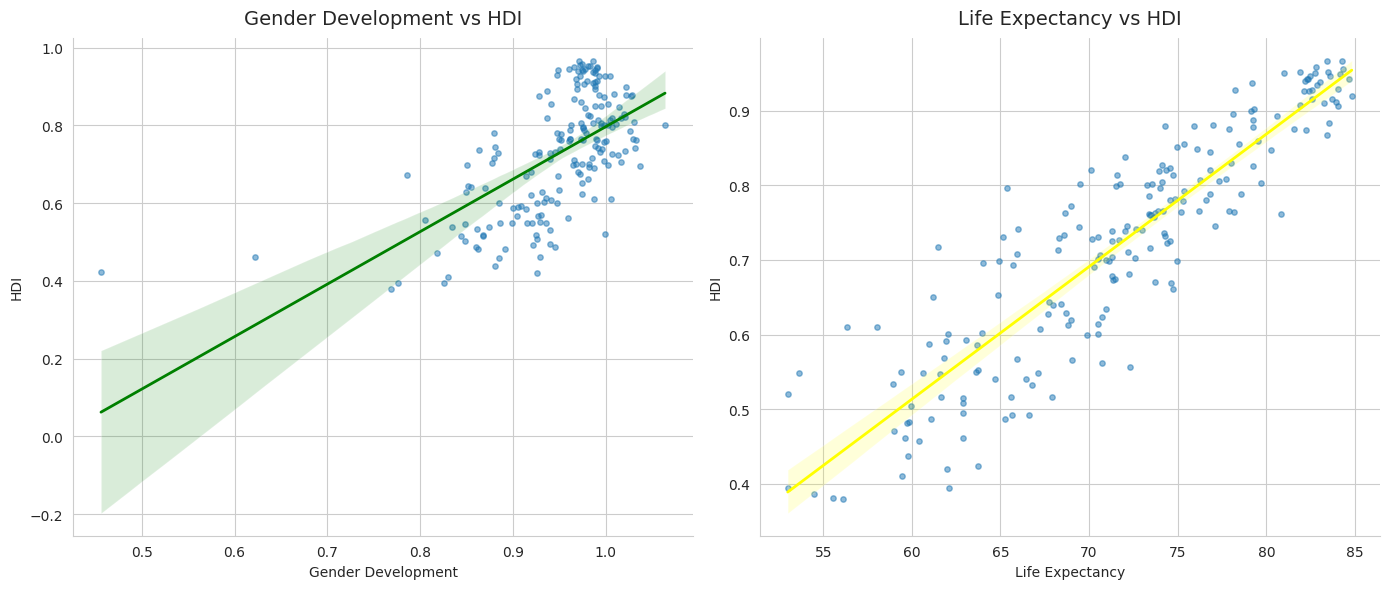

In [ ]:
# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Gender Development vs HDI
sns.regplot(
    data=hdi_2022_df, # Use the 2022 filtered data to reduce clustering
    x='gender_development',
    y='hdi',
    ax=axes[0],
    # s=15 makes dots smaller, alpha=0.5 adds transparency
    scatter_kws={'alpha': 0.5, 's': 15, 'color': '#1f77b4'},
    line_kws={'color': 'green', 'linewidth': 2}
)
axes[0].set_title("Gender Development vs HDI", fontsize=14, pad=10)
axes[0].set_xlabel("Gender Development")
axes[0].set_ylabel("HDI")

# 2. Life Expectancy vs HDI
sns.regplot(
    data=hdi_2022_df, # Use the 2022 filtered data to reduce clustering
    x='life_expectancy',
    y='hdi',
    ax=axes[1],
    # s=15 makes dots smaller, alpha=0.5 adds transparency
    scatter_kws={'alpha': 0.5, 's': 15, 'color': '#1f77b4'},
    line_kws={'color': 'yellow', 'linewidth': 2}
)
axes[1].set_title("Life Expectancy vs HDI", fontsize=14, pad=10)
axes[1].set_xlabel("Life Expectancy")
axes[1].set_ylabel("HDI")

# Improve overall layout
sns.despine() # Makes the chart look cleaner (removes top/right borders)
plt.tight_layout()
plt.show()

In [ ]:
corr_life = south_asia_df['life_expectancy'].corr(south_asia_df['hdi'])
corr_gender = south_asia_df['gender_development'].corr(south_asia_df['hdi'])

corr_life, corr_gender


(np.float64(0.9587610559043978), np.float64(0.865621005012754))

In [ ]:
south_asia_df['GNI_HDI_Gap'] = south_asia_df['gross_inc_percap'] - south_asia_df['hdi']


In [ ]:
gap_rank_desc = south_asia_df.sort_values('GNI_HDI_Gap', ascending=False)
gap_rank_asc = south_asia_df.sort_values('GNI_HDI_Gap')

gap_rank_desc[['country','GNI_HDI_Gap']].head(3), gap_rank_asc[['country','GNI_HDI_Gap']].head(3)


(       country  GNI_HDI_Gap
 3530  Maldives  18846.03019
 3527  Maldives  18679.17236
 3526  Maldives  18054.97765,
         country  GNI_HDI_Gap
 11  Afghanistan   980.789554
 10  Afghanistan  1047.002686
 9   Afghanistan  1121.985570)

In [ ]:
# Ensure numeric columns
numeric_cols = ['hdi','life_expectancy','gross_inc_percap','gender_development']
for col in numeric_cols:
    hdi_1b[col] = pd.to_numeric(hdi_1b[col], errors='coerce')

# Define regions
south_asia = [
    "Afghanistan","Bangladesh","Bhutan","India",
    "Maldives","Nepal","Pakistan","Sri Lanka"
]

middle_east = [
    "Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon",
    "Oman","Palestine","Qatar","Saudi Arabia","Syria",
    "United Arab Emirates","Yemen"
]

# Create subsets
south_asia_df = hdi_1b[hdi_1b['country'].isin(south_asia)].copy()
middle_east_df = hdi_1b[hdi_1b['country'].isin(middle_east)].copy()

# Save subsets (MANDATORY)
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

In [ ]:
stats = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean_HDI": [
        south_asia_df['hdi'].mean(),
        middle_east_df['hdi'].mean()
    ],
    "Std_HDI": [
        south_asia_df['hdi'].std(),
        middle_east_df['hdi'].std()
    ]
})

stats


,Region,Mean_HDI,Std_HDI
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


In [ ]:
# Compute average HDI per country
sa_avg = south_asia_df.groupby('country')['hdi'].mean()
me_avg = middle_east_df.groupby('country')['hdi'].mean()

sa_top = sa_avg.sort_values(ascending=False).head(3)
sa_bottom = sa_avg.sort_values().head(3)

me_top = me_avg.sort_values(ascending=False).head(3)
me_bottom = me_avg.sort_values().head(3)


In [ ]:
# Make sure your dataframes are ready
# south_asia_df and middle_east_df should already exist from previous cells

# Compute average HDI per country (2020-2022)
sa_avg = south_asia_df.groupby('country')['hdi'].mean()
me_avg = middle_east_df.groupby('country')['hdi'].mean()

# Top 3 and Bottom 3 for South Asia
sa_top = sa_avg.sort_values(ascending=False).head(3)
sa_bottom = sa_avg.sort_values(ascending=False).tail(3)  # better than .head(3) on ascending

# Top 3 and Bottom 3 for Middle East
me_top = me_avg.sort_values(ascending=False).head(3)
me_bottom = me_avg.sort_values(ascending=False).tail(3)

# Optional: print to verify
print("South Asia - Top 3:\n", sa_top)
print("\nSouth Asia - Bottom 3:\n", sa_bottom)
print("\nMiddle East - Top 3:\n", me_top)
print("\nMiddle East - Bottom 3:\n", me_bottom)

South Asia - Top 3:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia - Bottom 3:
 country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Middle East - Top 3:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East - Bottom 3:
 country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


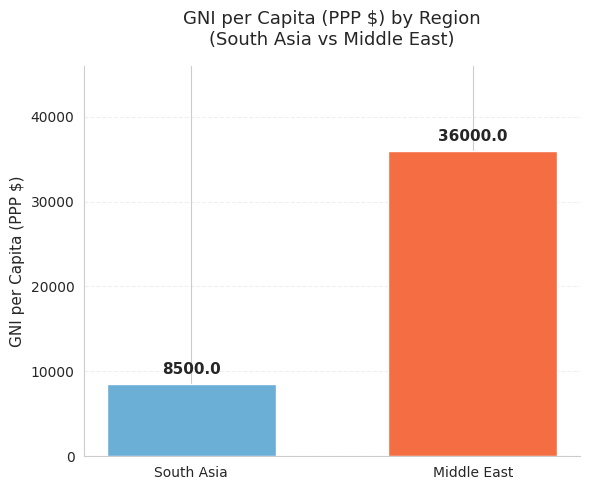

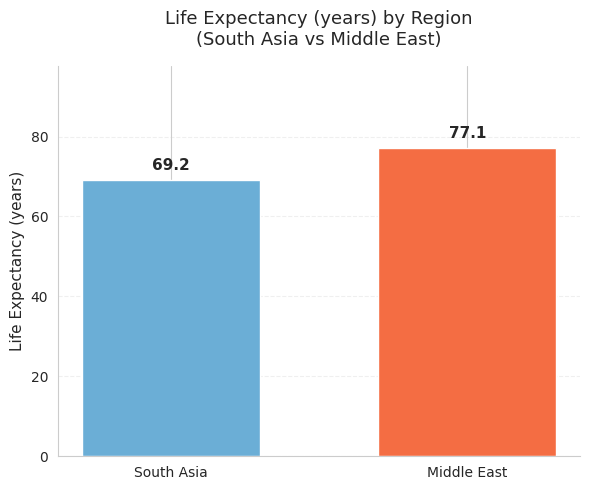

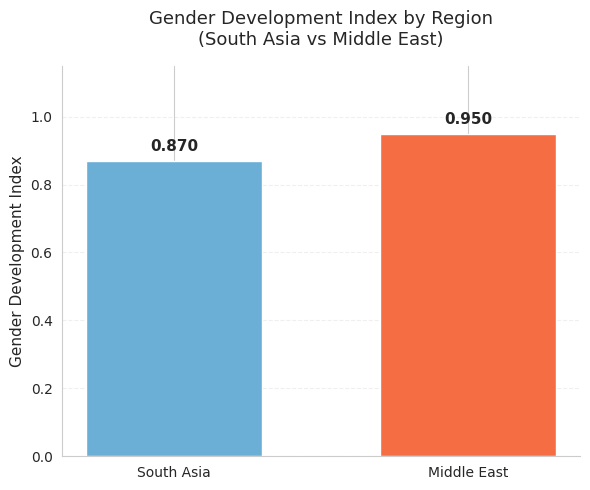

In [ ]:
# ========================
# Data (replace with your actual calculated means if different)
# ========================
regions = ['South Asia', 'Middle East']

# Approximate average values (2020-2022) - update with your real numbers!
gni_values = [8500, 36000]           # in PPP $
life_exp_values = [69.2, 77.1]       # in years
gdi_values = [0.87, 0.95]            # Gender Development Index

metrics = [
    ("GNI per Capita (PPP $)", gni_values, 40000),
    ("Life Expectancy (years)", life_exp_values, 85),
    ("Gender Development Index", gdi_values, 1.0)
]

# ========================
# Create three separate plots
# ========================
for title, values, max_y in metrics:
    plt.figure(figsize=(6, 5))

    # Colors: light blue for South Asia, coral/orange for Middle East
    colors = ['#6baed6', '#f46d43']

    bars = plt.bar(regions, values, color=colors, width=0.6)

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*max_y,
                 f'{yval:.1f}' if yval > 1 else f'{yval:.3f}',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.ylim(0, max_y * 1.15)  # give some headroom
    plt.title(f"{title} by Region\n(South Asia vs Middle East)", fontsize=13, pad=15)
    plt.ylabel(title, fontsize=11)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
disparity = pd.DataFrame({
    "Region": ["South Asia","Middle East"],
    "HDI_Range": [
        south_asia_df['hdi'].max() - south_asia_df['hdi'].min(),
        middle_east_df['hdi'].max() - middle_east_df['hdi'].min()
    ],
    "HDI_CV": [
        south_asia_df['hdi'].std() / south_asia_df['hdi'].mean(),
        middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()
    ]
})

disparity


,Region,HDI_Range,HDI_CV
0,South Asia,0.321,0.153652
1,Middle East,0.513,0.179101


In [ ]:
# Correlations
corr_df = pd.DataFrame({
    "Region": ["South Asia","Middle East"],
    "HDI vs Gender Dev": [
        south_asia_df['hdi'].corr(south_asia_df['gender_development']),
        middle_east_df['hdi'].corr(middle_east_df['gender_development'])
    ],
    "HDI vs Life Expectancy": [
        south_asia_df['hdi'].corr(south_asia_df['life_expectancy']),
        middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])
    ]
})

corr_df


,Region,HDI vs Gender Dev,HDI vs Life Expectancy
0,South Asia,0.874218,0.938764
1,Middle East,0.935670,0.933123


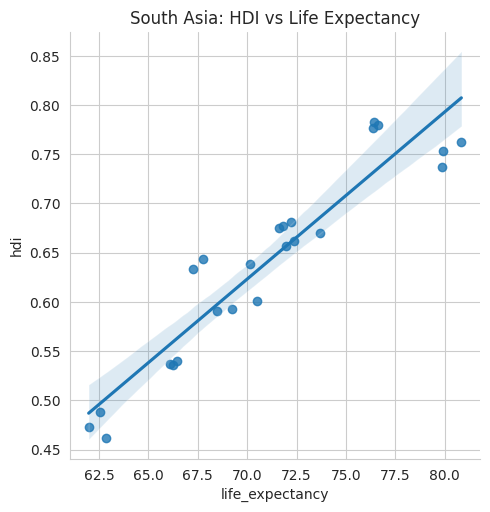

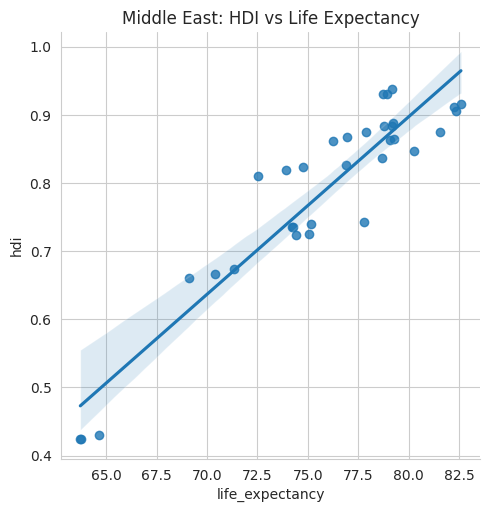

In [ ]:
sns.lmplot(data=south_asia_df, x='life_expectancy', y='hdi')
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

sns.lmplot(data=middle_east_df, x='life_expectancy', y='hdi')
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()


In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)

south_asia_df['Outlier'] = (
    detect_outliers(south_asia_df['hdi']) |
    detect_outliers(south_asia_df['gross_inc_percap'])
)

middle_east_df['Outlier'] = (
    detect_outliers(middle_east_df['hdi']) |
    detect_outliers(middle_east_df['gross_inc_percap'])
)


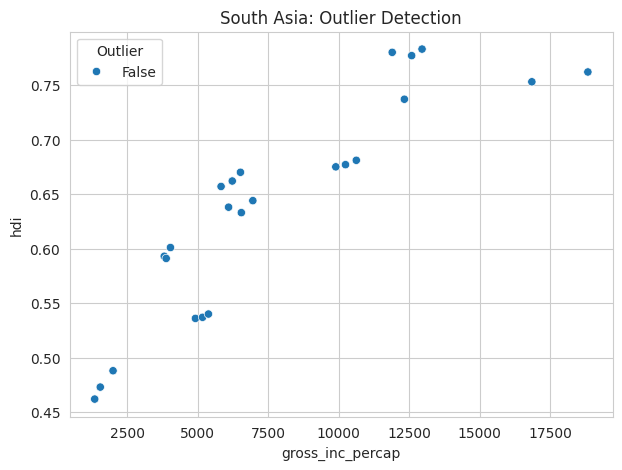

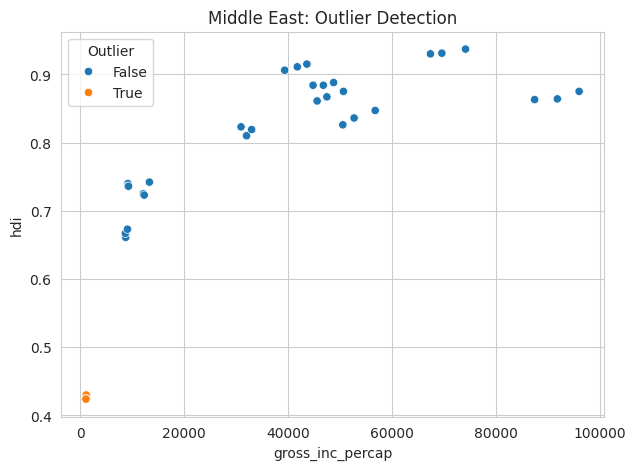

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap', y='hdi',
    hue='Outlier'
)
plt.title("South Asia: Outlier Detection")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=middle_east_df,
    x='gross_inc_percap', y='hdi',
    hue='Outlier'
)
plt.title("Middle East: Outlier Detection")
plt.show()
